## Data exploration analysis

In [1]:
import pandas as pd
import numpy as np

# Read the CSV file
all_stations = pd.read_csv('cleaned_datasets/all_stations.csv')
all_trips = pd.read_csv('cleaned_datasets/all_trips.csv')

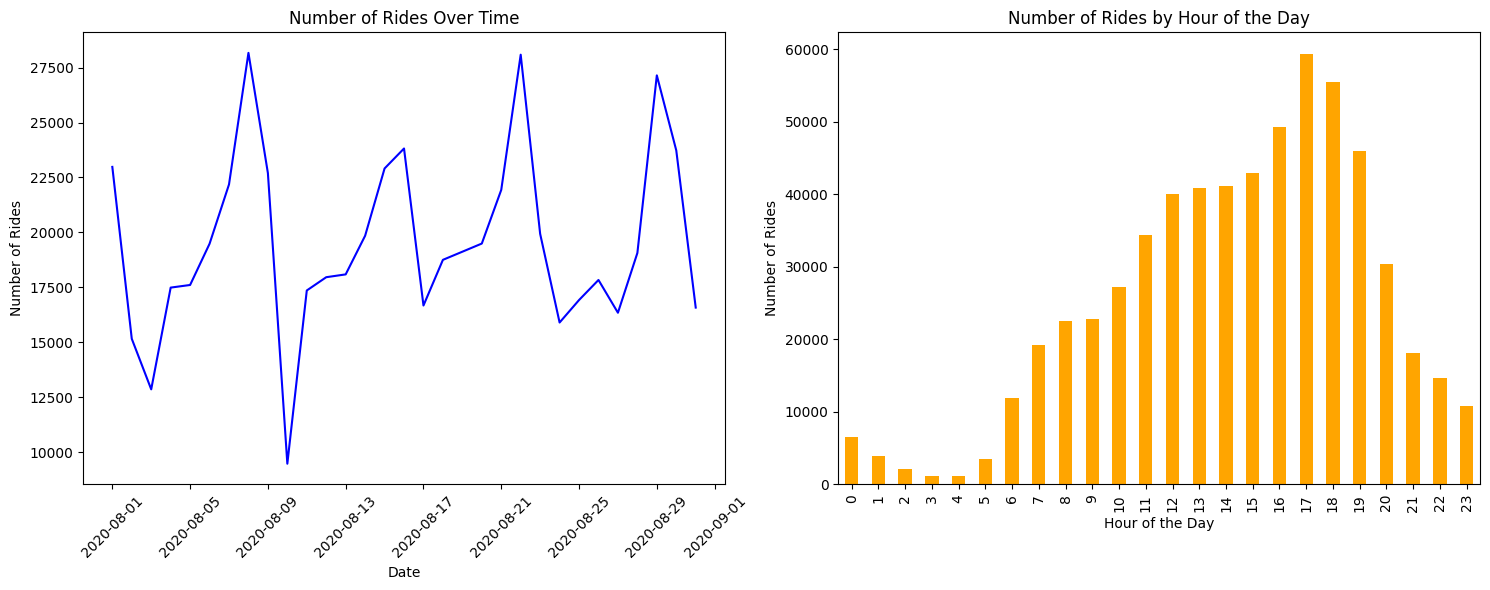

In [2]:
import matplotlib.pyplot as plt

# Convert 'started_at' to datetime if it's not already
all_trips['started_at'] = pd.to_datetime(all_trips['started_at'])

# Set figure size for the plots
plt.figure(figsize=(15, 6))

# Subplot 1: Number of Rides Over Time
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
all_trips['started_at'].dt.date.value_counts().sort_index().plot(kind='line', color='blue')
plt.title('Number of Rides Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Subplot 2: Number of Rides by Hour
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
all_trips['started_at'].dt.hour.value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Number of Rides by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')

# Save the plot as an image file
plt.savefig('./outputs/rides_over_time.png', format='png', dpi=300, bbox_inches='tight')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

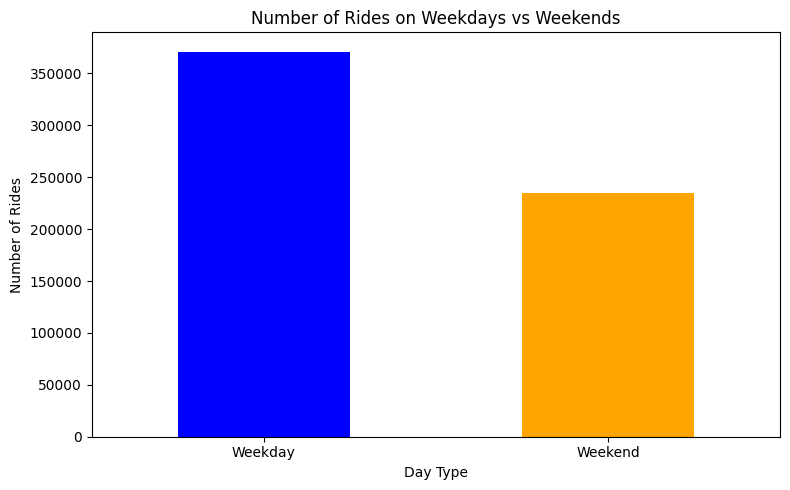

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'started_at' to datetime if it's not already
all_trips['started_at'] = pd.to_datetime(all_trips['started_at'])

# Create a new column for the day of the week
all_trips['day_of_week'] = all_trips['started_at'].dt.day_name()

# Define a function to categorize days into weekdays and weekends
def categorize_day(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

# Apply the function to create a new column for categorization
all_trips['day_type'] = all_trips['day_of_week'].apply(categorize_day)

# Count the number of rides for weekdays and weekends
rides_by_day_type = all_trips['day_type'].value_counts()

# Plotting the results
plt.figure(figsize=(8, 5))
rides_by_day_type.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Rides on Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Save the plot as an image file
plt.savefig('./outputs/rides_weekdays_vs_weekends.png', format='png', dpi=300)

# Show the plot
plt.tight_layout()
plt.show()




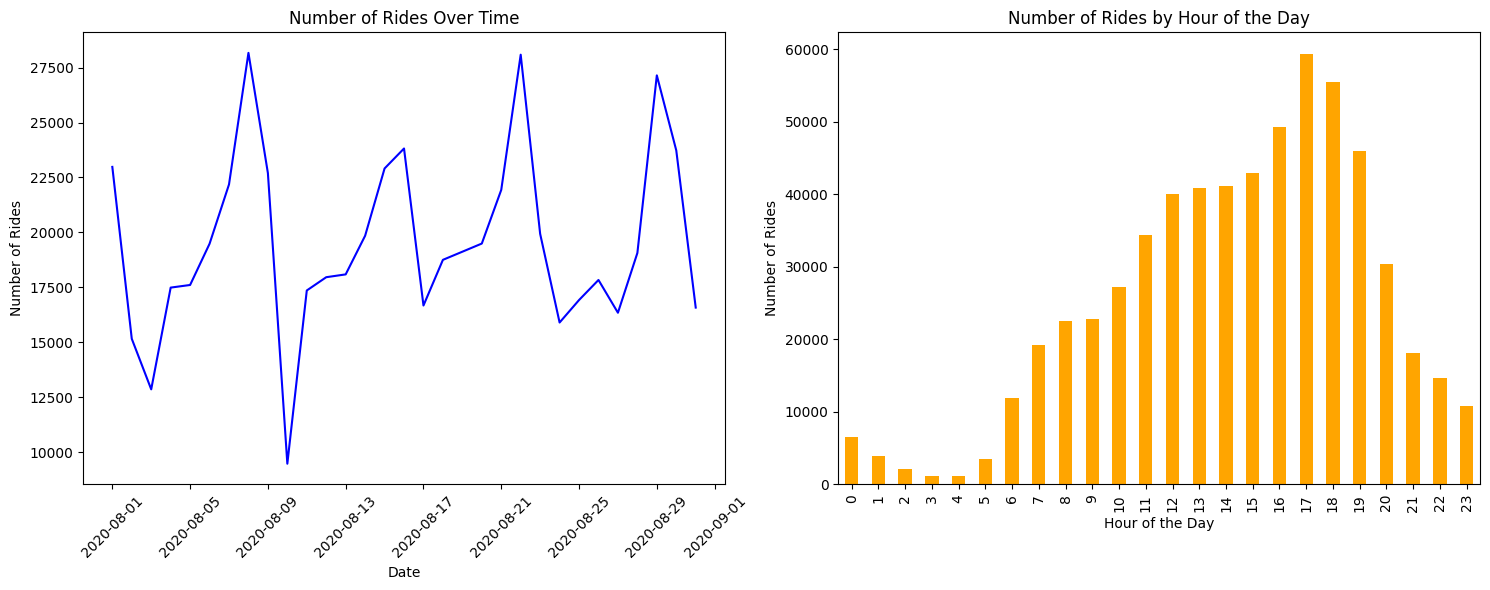

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'started_at' to datetime if it's not already
all_trips['started_at'] = pd.to_datetime(all_trips['started_at'])

# Set figure size for the plots
plt.figure(figsize=(15, 6))

# Subplot 1: Number of Rides Over Time
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
all_trips['started_at'].dt.date.value_counts().sort_index().plot(kind='line', color='blue')
plt.title('Number of Rides Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Subplot 2: Number of Rides by Hour
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
all_trips['started_at'].dt.hour.value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Number of Rides by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')

# Save the plot as an image file
plt.savefig('./outputs/rides_over_time.png', format='png', dpi=300, bbox_inches='tight')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

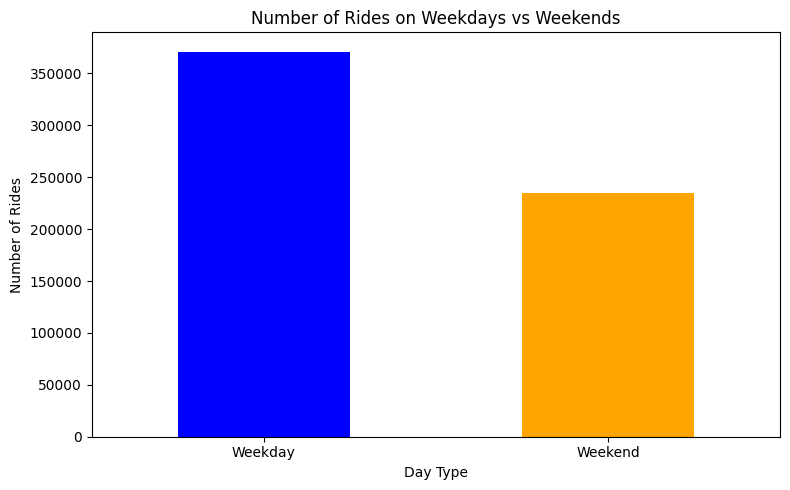

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'started_at' to datetime if it's not already
all_trips['started_at'] = pd.to_datetime(all_trips['started_at'])

# Create a new column for the day of the week
all_trips['day_of_week'] = all_trips['started_at'].dt.day_name()

# Define a function to categorize days into weekdays and weekends
def categorize_day(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

# Apply the function to create a new column for categorization
all_trips['day_type'] = all_trips['day_of_week'].apply(categorize_day)

# Count the number of rides for weekdays and weekends
rides_by_day_type = all_trips['day_type'].value_counts()

# Plotting the results
plt.figure(figsize=(8, 5))
rides_by_day_type.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Rides on Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Save the plot as an image file
plt.savefig('./outputs/rides_weekdays_vs_weekends.png', format='png', dpi=300)

# Show the plot
plt.tight_layout()
plt.show()


